# Tech Challenge | Fase 1 | pós IA para DEVs
- Silvio Sales do Nascimento Junior

### O problema
Você é um profissional encarregado de desenvolver um modelo preditivo de regressão para prever o valor dos custos médicos individuais cobrados pelo seguro de saúde.

A base de dados para este desafio pode ser algo como no exemplo a seguir:
```csv 
idade,gênero,imc,filhos,fumante,região,encargos
56,feminino,29.774373714007336,2,sim,sudoeste,31109.889763423336
46,masculino,25.857394655216346,1,não,nordeste,26650.702646642694
32,masculino,23.014839993647488,0,não,sudoeste,21459.03799039332
```
Você precisa apenas alimentar ela com mais informações ou utilizar uma outra de sua preferência.        

## Criação da base de dados
Utilizamos ChatGPT 4 com o seguinte prompt:
```txt
Crie uma base de dados no formato csv, com 21 mil registros (linhas), sobre usuários de planos de saúde com encargos médicos em um contexto do Brasil. Vou te passar as colunas dessa base de dados com informações para gerar os registros:
- Coluna com título "IMC": número com ponto flutuante, do tipo float, aleatório entre 17.000000000000000 a  41.0000000000000000.
- Coluna com título "idade": contendo em cada registro um numero do tipo inteiro, aleatório entre 0 a 98.
- Coluna com título "genero": valor de texto contendo "masculino" ou "feminino", com predominância para o feminino. 
- Coluna com título "filhos": contendo como valor um número do tipo inteiro, aleatório entre 0 a 12.
- Coluna com título "fumante": contendo "sim" ou "nao".
- Coluna com título "regiao": contendo um dos seguinte texto "Norte" ou "Nordeste" ou "Centro-Oeste" ou "Sudeste" ou "Sul".
- Coluna com título "encargos": número com ponto flutuante, do tipo float, aleatório entre 900.000000000000 a 150000.000000000000. 
Simule falhas espalhando na base de dados 235 registros com valores vazios em região.
```
Base de dados salvo no repositório do GitHub

### Tarefas
#### 1. Exploração de dados:
#### **1.1 Carregue a base de dados e explore suas características.**

            

*alguns comandos da aula 2 de Machine Learning*

In [579]:
import pandas as pd
dataset = pd.read_csv("encargos_medicos5.csv")

In [580]:
## Vizualizar as primeiras linhas de um DataFrame
dataset.head()

,IMC,idade,genero,filhos,fumante,regiao,encargos
0,33.936515,31,feminino,9.0,nao,Norte,139478.140511
1,28.547185,40,feminino,3.0,nao,Sudeste,4550.872762
2,21.627053,89,masculino,9.0,nao,Norte,132955.095637
3,26.515120,32,feminino,NaN,nao,Sudeste,110722.100725
4,28.121540,87,masculino,3.0,nao,Sudeste,79250.181542


In [581]:
"Tamanho do DataFrame (linhas, colunas):", dataset.shape

('Tamanho do DataFrame (linhas, colunas):', (21000, 7))

In [582]:
# Tipos de dados das colunas 
dataset.dtypes

IMC         float64
idade         int64
genero       object
filhos      float64
fumante      object
regiao       object
encargos    float64
dtype: object

In [583]:
# Verificando valores ausentes
dataset.isnull().sum()

IMC           0
idade         0
genero        0
filhos      235
fumante       0
regiao        0
encargos      0
dtype: int64

In [584]:
# Este comando substitui os dois de cima
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   IMC       21000 non-null  float64
 1   idade     21000 non-null  int64  
 2   genero    21000 non-null  object 
 3   filhos    20765 non-null  float64
 4   fumante   21000 non-null  object 
 5   regiao    21000 non-null  object 
 6   encargos  21000 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 1.1+ MB


Do total de **21.000** registros temos **235** com o campo "regiao" **vazio**

Temos 3 variáveis/colunas do tipo **texto**: **genero, fumante e regiao**

#### **1.2 Analise estatísticas descritivas e visualize distribuições relevantes.**

#### Analisando textos:

In [585]:
# Analisando quantas categorias de regiões existem:
set(dataset["regiao"])

{'Centro-Oeste', 'Nordeste', 'Norte', 'Sudeste', 'Sul'}

In [586]:
# Verificando qtd de registros de cada região
dataset["regiao"].value_counts()

regiao
Sudeste         7293
Sul             5316
Norte           3168
Nordeste        3124
Centro-Oeste    2099
Name: count, dtype: int64

In [587]:
# Verificando qtd de registros de fumantes e não fumantes
dataset["fumante"].value_counts()

fumante
nao    16826
sim     4174
Name: count, dtype: int64

In [588]:
# Verifiando a qtd de registros de genero
dataset["genero"].value_counts()

genero
feminino     11495
masculino     9505
Name: count, dtype: int64

Existem **predominâncias** de registros:
* na região **Sudeste**
* pessoas **não fumantes**
* gênero **feminino**

#### Analisando dados númericos
**Estatísticas DESCRITIVAS**

In [589]:
dataset.describe()

,IMC,idade,filhos,encargos
count,21000.000000,21000.000000,20765.000000,21000.000000
mean,27.434412,46.779048,4.595810,110930.462293
std,5.823893,28.642791,3.840194,68208.880310
min,17.005302,0.000000,0.000000,995.677064
25%,22.762517,22.000000,1.000000,53480.182358
50%,27.325127,45.000000,4.000000,106985.428801
75%,31.622054,71.000000,8.000000,159749.475595
max,40.999158,98.000000,12.000000,296145.906194


Distribuições com histogramas:

array([[<Axes: title={'center': 'IMC'}>,
        <Axes: title={'center': 'idade'}>],
       [<Axes: title={'center': 'filhos'}>,
        <Axes: title={'center': 'encargos'}>]], dtype=object)

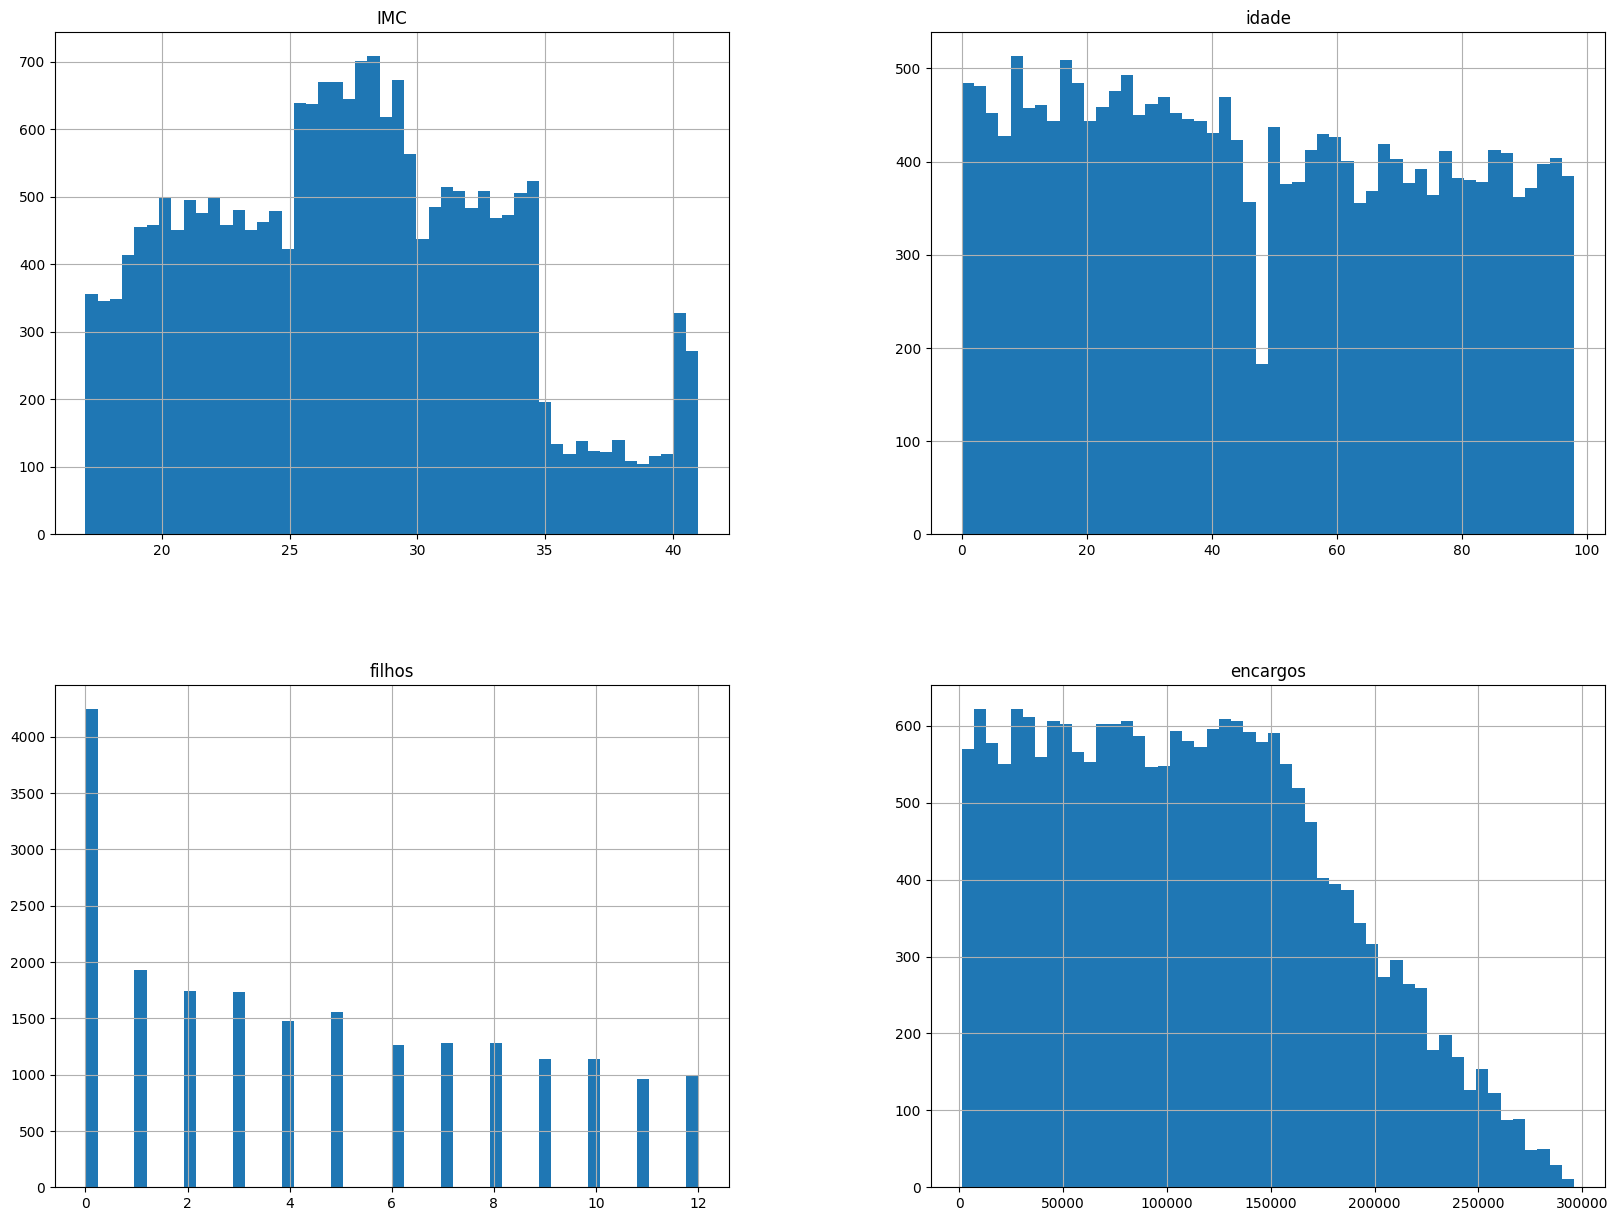

In [590]:
import matplotlib.pyplot as plt

dataset.hist(bins=50, figsize=(20,15))

(array([16826.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  4174.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

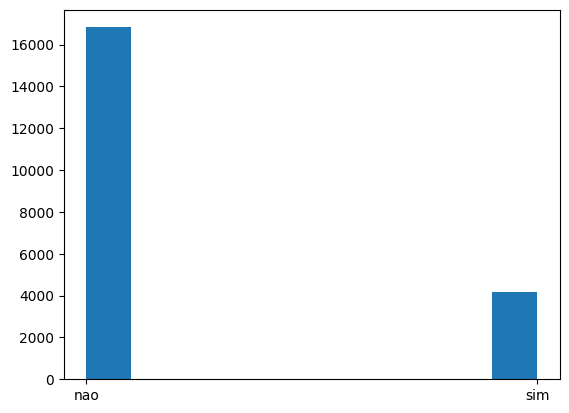

In [591]:
plt.hist(dataset['fumante'])

(array([11495.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  9505.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

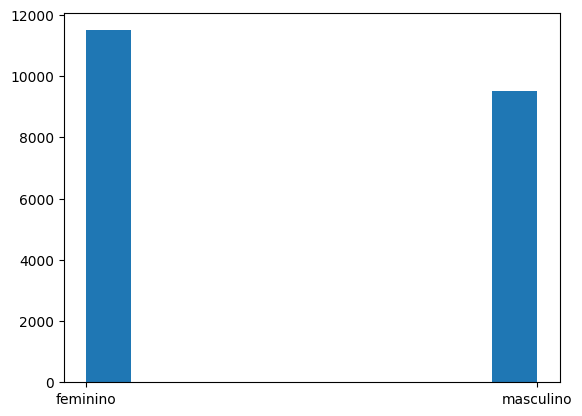

In [592]:
plt.hist(dataset['genero'])

(array([3168.,    0., 7293.,    0.,    0., 2099.,    0., 5316.,    0.,
        3124.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

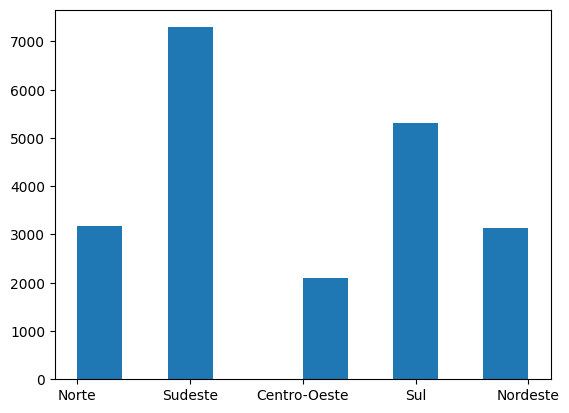

In [593]:
plt.hist(dataset['regiao'])

Observações encontradas:
* Nota-se uma tendência maior em torno de IMCs classificados como sobrepeso (25-30).
* A idade parece ter uma distribuição relativamente uniforme, com um pico na faixa dos 50, refletindo maior preocupação com planos de saúde nessa faixa etária.
* A maioria das pessoas na base de dados não tem filhos ou tem poucos filhos. Isso é esperado, considerando que pessoas mais jovens que possuem (menos de 14 anos) costuman não ter filhos.
* Os encargos médicos mostram uma distribuição com uma cauda longa à direita, indicando que a maioria das pessoas tem encargos menores, com alguns indivíduos tendo encargos muito altos. Este padrão é típico para despesas médicas, onde a maioria tem custos baixos a moderados regularmente, mas poucos enfrentam condições de alto custo que elevam drasticamente os encargos.

#### 2. Pré-processamento de dados:
#### **2.1 Realize a limpeza dos dados, tratando valores ausentes (se necessário):**

In [594]:
# listando as colunas nulas

sample_incomplete_rows = dataset[dataset.isnull().any(axis=1)].head()
sample_incomplete_rows

,IMC,idade,genero,filhos,fumante,regiao,encargos
3,26.515120,32,feminino,NaN,nao,Sudeste,110722.100725
54,25.840553,65,feminino,NaN,nao,Centro-Oeste,128217.706462
114,20.087980,81,masculino,NaN,nao,Sudeste,25897.299859
359,29.042106,48,masculino,NaN,nao,Sul,29774.823178
366,28.022555,15,feminino,NaN,nao,Norte,34658.890786


In [595]:
dataset.isnull().sum()

IMC           0
idade         0
genero        0
filhos      235
fumante       0
regiao        0
encargos      0
dtype: int64

Convertendo a coluna fumante para "sim" igual 1 e "nao" igual a 0

In [596]:
dataset['fumante'] = dataset['fumante'].replace({'sim': 1, 'nao': 0})

C:\Users\Silvio\AppData\Local\Temp\ipykernel_26372\4048709026.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['fumante'] = dataset['fumante'].replace({'sim': 1, 'nao': 0})


In [597]:
try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer

imputer = SimpleImputer(strategy="median")

In [598]:
encargos_medicos_num = dataset.drop(['regiao', 'genero'], axis=1)

In [599]:
imputer.fit(encargos_medicos_num) # calculando a mediana de cada atributo e armazenando o resultado na variável statistics_

SimpleImputer(strategy='median')

In [600]:
imputer.statistics_

array([2.73251270e+01, 4.50000000e+01, 4.00000000e+00, 0.00000000e+00,
       1.06985429e+05])

In [601]:
encargos_medicos_num.median().values

array([2.73251270e+01, 4.50000000e+01, 4.00000000e+00, 0.00000000e+00,
       1.06985429e+05])

In [602]:
X = imputer.transform(encargos_medicos_num) # o resultado é um array.

In [603]:
X

array([[3.39365149e+01, 3.10000000e+01, 9.00000000e+00, 0.00000000e+00,
        1.39478141e+05],
       [2.85471850e+01, 4.00000000e+01, 3.00000000e+00, 0.00000000e+00,
        4.55087276e+03],
       [2.16270535e+01, 8.90000000e+01, 9.00000000e+00, 0.00000000e+00,
        1.32955096e+05],
       ...,
       [1.82826048e+01, 2.00000000e+01, 3.00000000e+00, 0.00000000e+00,
        1.09216570e+05],
       [2.10800694e+01, 6.40000000e+01, 6.00000000e+00, 1.00000000e+00,
        7.67930069e+04],
       [3.20319764e+01, 3.30000000e+01, 8.00000000e+00, 1.00000000e+00,
        1.83573397e+05]])

In [604]:
encargos_medicos_tr = pd.DataFrame(X, columns=encargos_medicos_num.columns,
                          index=dataset.index)

In [605]:
encargos_medicos_tr

,IMC,idade,filhos,fumante,encargos
0,33.936515,31.0,9.0,0.0,139478.140511
1,28.547185,40.0,3.0,0.0,4550.872762
2,21.627053,89.0,9.0,0.0,132955.095637
3,26.515120,32.0,4.0,0.0,110722.100725
4,28.121540,87.0,3.0,0.0,79250.181542
...,...,...,...,...,...
20995,25.416112,94.0,10.0,0.0,266650.221495
20996,34.322996,78.0,5.0,0.0,147326.778279
20997,18.282605,20.0,3.0,0.0,109216.569928
20998,21.080069,64.0,6.0,1.0,76793.006871


In [606]:
# verificando os resultados
encargos_medicos_tr.loc[sample_incomplete_rows.index.values]

,IMC,idade,filhos,fumante,encargos
3,26.515120,32.0,4.0,0.0,110722.100725
54,25.840553,65.0,4.0,0.0,128217.706462
114,20.087980,81.0,4.0,0.0,25897.299859
359,29.042106,48.0,4.0,0.0,29774.823178
366,28.022555,15.0,4.0,0.0,34658.890786


In [607]:
imputer.strategy

'median'

In [608]:
encargos_medicos_tr = pd.DataFrame(X, columns=encargos_medicos_num.columns,
                          index=dataset.index)

In [609]:
encargos_medicos_tr.head()

,IMC,idade,filhos,fumante,encargos
0,33.936515,31.0,9.0,0.0,139478.140511
1,28.547185,40.0,3.0,0.0,4550.872762
2,21.627053,89.0,9.0,0.0,132955.095637
3,26.515120,32.0,4.0,0.0,110722.100725
4,28.121540,87.0,3.0,0.0,79250.181542


Criando a pipeline de pré-processamento dos dados 
Padronização

In [610]:
genero_cat = dataset[['genero']]
genero_cat.head(10)

,genero
0,feminino
1,feminino
2,masculino
3,feminino
4,masculino
5,feminino
6,feminino
7,feminino
8,feminino
9,feminino


In [611]:
regiao_cat = dataset[['regiao']]
regiao_cat.head(10)

,regiao
0,Norte
1,Sudeste
2,Norte
3,Sudeste
4,Sudeste
5,Sudeste
6,Sudeste
7,Centro-Oeste
8,Sudeste
9,Sudeste


In [612]:
genero_cat = dataset[['genero']]
genero_cat.head(10)

,genero
0,feminino
1,feminino
2,masculino
3,feminino
4,masculino
5,feminino
6,feminino
7,feminino
8,feminino
9,feminino


In [613]:
try:
    from sklearn.preprocessing import OrdinalEncoder
except ImportError:
    from future_encoders import OrdinalEncoder # Scikit-Learn < 0.20

In [614]:
ordinal_encoder = OrdinalEncoder()
regiao_cat_encoded = ordinal_encoder.fit_transform(regiao_cat)
regiao_cat_encoded[:10]

array([[2.],
       [3.],
       [2.],
       [3.],
       [3.],
       [3.],
       [3.],
       [0.],
       [3.],
       [3.]])

In [615]:
ordinal_encoder.categories_

[array(['Centro-Oeste', 'Nordeste', 'Norte', 'Sudeste', 'Sul'],
       dtype=object)]

In [616]:
#genero
genero_cat_encoded = ordinal_encoder.fit_transform(genero_cat)
genero_cat_encoded[:10]

array([[0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [617]:
ordinal_encoder.categories_

[array(['feminino', 'masculino'], dtype=object)]

In [618]:
try:
    from sklearn.preprocessing import OrdinalEncoder # apenas para gerar um ImportError se Scikit-Learn < 0.20
    from sklearn.preprocessing import OneHotEncoder
except ImportError:
    from future_encoders import OneHotEncoder # Scikit-Learn < 0.20

# cat_encoder = OneHotEncoder(sparse=False) # Versão anterior do Scikit-Learn
cat_encoder = OneHotEncoder(sparse_output=False)
regiao_cat_1hot = cat_encoder.fit_transform(regiao_cat)
regiao_cat_1hot

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [619]:
# cat_encoder = OneHotEncoder(sparse=False) # Versão anterior do Scikit-Learn

genero_cat_1hot = cat_encoder.fit_transform(genero_cat)
genero_cat_1hot

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

# Criando a pipeline de pré-processamento dos dados

In [620]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")), #substituindo valores nulos pela mediana
        ('std_scaler', StandardScaler()), # padronizando as escalas dos dados
    ])

encargos_medicos_num_tr = num_pipeline.fit_transform(encargos_medicos_num)

In [621]:
encargos_medicos_num_tr

array([[ 1.11647967, -0.55090383,  1.15495598, -0.49806472,  0.41854313],
       [ 0.19107485, -0.23668116, -0.41610734, -0.49806472, -1.55965209],
       [-0.99718477,  1.47408671,  1.15495598, -0.49806472,  0.32290748],
       ...,
       [-1.57146189, -0.93495376, -0.41610734, -0.49806472, -0.02512771],
       [-1.0911077 ,  0.60124596,  0.36942432,  2.0077712 , -0.50049595],
       [ 0.78945031, -0.48107657,  0.8931121 ,  2.0077712 ,  1.06503236]])

In [622]:
try:
    from sklearn.compose import ColumnTransformer
except ImportError:
    from future_encoders import ColumnTransformer # Scikit-Learn < 0.20

In [623]:
from sklearn.compose import ColumnTransformer

num_attribs = list(encargos_medicos_num)
cat_attribs = ["genero", "regiao"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs), #tratando as variáveis numéricas (chamando a pipeline de cima)
        ("cat", OneHotEncoder(), cat_attribs), # tratando as variáveis categóricas
    ])

encargos_medicos_prepared = full_pipeline.fit_transform(dataset)

In [624]:
encargos_medicos_prepared

array([[ 1.11647967, -0.55090383,  1.15495598, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.19107485, -0.23668116, -0.41610734, ...,  0.        ,
         1.        ,  0.        ],
       [-0.99718477,  1.47408671,  1.15495598, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-1.57146189, -0.93495376, -0.41610734, ...,  0.        ,
         1.        ,  0.        ],
       [-1.0911077 ,  0.60124596,  0.36942432, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.78945031, -0.48107657,  0.8931121 , ...,  0.        ,
         0.        ,  1.        ]])

In [625]:
encargos_medicos_prepared.shape

(21000, 12)

In [626]:
type(encargos_medicos_prepared)

numpy.ndarray

In [627]:
column_names = [
    'IMC','idade', 'filhos', 'fumante', 'encargos', 'feminino', 'masculino', 'Centro-Oeste', 'Nordeste', 'Norte', 'Sudeste', 'Sul']

# Transformar o array em DataFrame
encargos_medicos_df = pd.DataFrame(data=encargos_medicos_prepared, columns=column_names)

# Exibir o DataFrame resultante
print(encargos_medicos_df.shape)

(21000, 12)


In [628]:
encargos_medicos_df.head(20)

,IMC,idade,filhos,fumante,encargos,feminino,masculino,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
0,1.116480,-0.550904,1.154956,-0.498065,0.418543,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.191075,-0.236681,-0.416107,-0.498065,-1.559652,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.997185,1.474087,1.154956,-0.498065,0.322907,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,-0.157852,-0.515990,-0.154263,-0.498065,-0.003055,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.117987,1.404259,-0.416107,-0.498065,-0.464471,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,-1.003369,0.217196,0.107580,-0.498065,-0.875003,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,-0.067066,0.356851,1.154956,-0.498065,-1.005476,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.202357,0.496505,1.154956,-0.498065,0.801700,1.0,0.0,1.0,0.0,0.0,0.0,0.0
8,-0.932761,-0.062113,-0.939795,-0.498065,-0.110448,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9,-0.616604,0.845641,1.416800,-0.498065,-1.524413,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [631]:
print(encargos_medicos_df.isnull().sum())

IMC             0
idade           0
filhos          0
fumante         0
encargos        0
feminino        0
masculino       0
Centro-Oeste    0
Nordeste        0
Norte           0
Sudeste         0
Sul             0
dtype: int64
